### 让我们用以前学习过的知识，来对美国每一年的人口出生数据进行统计分析

- 通过本次分享，你将有机会巩固以下知识：
	- 在图像中添加文字
	- 创建透视表
	- 日期时间类型的转换

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

In [10]:
# 读取原始数据 births.csv
path = 'births.csv'
births = pd.read_csv(path)
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [11]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


#### 读取原始数据 下面是根据统计学的一些原理，过滤数据，我不懂，请大虾指导

In [12]:
quartiles = np.percentile(births['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [13]:
mu,sig = quartiles[1],0.74*(quartiles[2]-quartiles[0])
births = births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')

In [14]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [18]:
# 将day行由float转换为int，再创建时间类型的index year month day
births['year'].dtype # dtype('int64')
births['month'].dtype # dtype('int64')
births['day'].dtype # dtype('float64')
births['day'] = births['day'].astype(int)
births['day'].dtype # dtype('int64')

dtype('int64')

In [19]:
# 20210209
births.index = pd.to_datetime(births['year']*10000+births['month']*100+births['day'],format='%Y%m%d')
births.head(3)

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454


In [21]:
type(births.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [22]:
# 创建时间间隔类类型的数据
index2 = pd.PeriodIndex(year=births['year'],month=births['month'],day=births['day'],freq='D')
index2

PeriodIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
             '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
             '1969-01-05', '1969-01-05',
             ...
             '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
             '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
             '1988-12-31', '1988-12-31'],
            dtype='period[D]', length=14610, freq='D')

In [24]:
# 创建针对births这一列的透视表
births_by_date = births.pivot_table('births',[births.index.month,births.index.day],aggfunc='mean')
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [25]:
births_by_date.index

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (12, 22),
            (12, 23),
            (12, 24),
            (12, 25),
            (12, 26),
            (12, 27),
            (12, 28),
            (12, 29),
            (12, 30),
            (12, 31)],
           length=366)

In [26]:
# 重新构建透视表的index，假设其为2012年整年的数据
births_by_date.index = [ pd.datetime(2012,month,day) for (month,day) in births_by_date.index ]
births_by_date.index.freq = 'D'

In [27]:
births_by_date.head(3)

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900


Text(247, 4850, 'labor day')

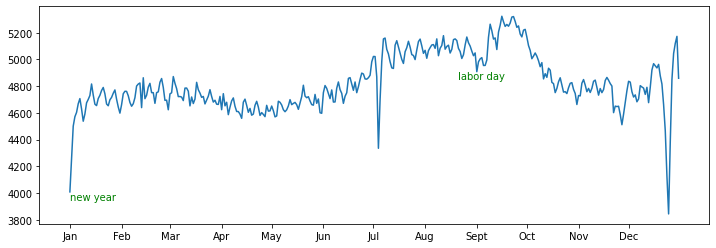

In [34]:
# 生成x轴要显示的下标位置，以及在此位置要显示的内容
month_li = list(births_by_date.index.month)
val_count = {}
for i in month_li:
    if i not in val_count:
        val_count[i] = 1
    else:
        val_count[i] += 1
x_index = [0,]
index = 0
for i in val_count:
    index += val_count[i]
    x_index.append(index)
x_index = x_index[:-1]
_x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

# 绘制2012年每一天的生育率折线图
plt.figure(figsize=(12,4))
plt.plot(range(len(births_by_date.index)),births_by_date['births'])
plt.xticks(x_index,_x)
style = {'size':10,'color':'green'}
plt.text(0,3950,'new year',ha='left',**style)
plt.text(247,4850,'labor day',ha='center',**style)

Text(2012-9-4, 4850, 'labor day')

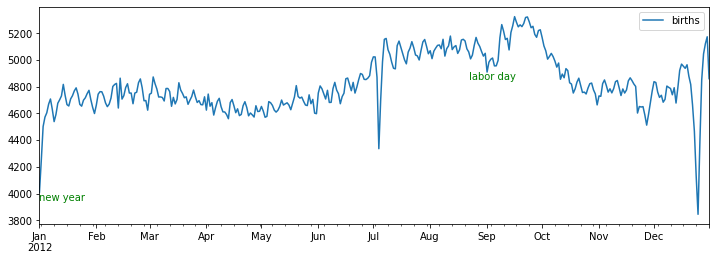

In [29]:
# 为图像添加文字
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)
style = {'size':10,'color':'green'}
ax.text('2012-1-1',3950,'new year',ha='left',**style)
ax.text('2012-9-4',4850,'labor day',ha='center',**style)

#### 附赠一个为图像添加箭头指示文字的示例

Text(2, -4, 'local minimum')

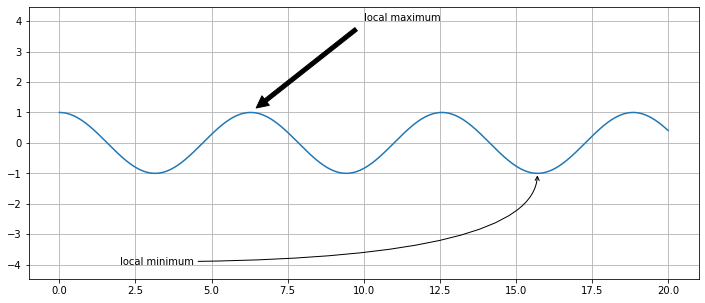

In [37]:
fig,ax = plt.subplots(figsize=(12,5))
x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')
ax.grid()

ax.annotate('local maximum',xy=(6.28,1),xytext=(10,4),arrowprops={'facecolor':'black','shrink':0.05})
ax.annotate('local minimum',xy=(5*np.pi,-1),xytext=(2,-4),arrowprops={'arrowstyle':'->','connectionstyle':'angle3,angleA=0,angleB=-90'})